<a href="https://colab.research.google.com/github/busybee23/Neural-Networks/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:

import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

In [33]:
(X_train, y_train) ,(X_test, y_test) = mnist.load_data()
X_test = X_test / 255.0 
X_train = X_train / 255.0


[[0.         0.         0.         0.         0.         0.         0.00392157 0.         0.         0.         0.         0.01176471 0.         0.         0.         0.         0.
  0.04313725 0.         0.         0.         0.         0.00784314 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.22745098 0.63137255 0.81568627 0.74117647 0.65882353 0.63529412 0.63921569 0.75294118
  0.8627451  0.63529412 0.42745098 0.05490196 0.         0.         0.00392157 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.         0.         0.50588235 0.73333333 0.81960784 0.80784314 0.77254902 0.81568627 0.81568627 0.78431373 0.81568627 0.81568627
  0.76862745 0.8        0.82745098 0.79215686 0.64313725 0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0

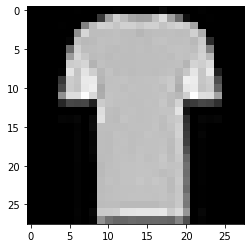

In [34]:
import numpy as np
np.set_printoptions(linewidth =200)
import matplotlib.pyplot as plt
plt.imshow(X_train[880], cmap='gray')
print(X_train[880])

In [21]:

callbacks = myCallback()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20,callbacks=[callbacks])

In [ ]:
model.evaluate(X_test, y_test)